## IBM HR Analytics Employee Attrition & Performance

1. Problem Types:  CLassification 
2. target : Attrition 
     * ex :- Leaving the company for some personal reason without the any active layoffs
3. Goal:Predict which employees will leave

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('mysql_data.csv')
df.head()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ï»¿Age                    1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.isnull().sum().sort_values(ascending=False)

ï»¿Age                      0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['ï»¿Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
## Here we Replace the Age with some symbols to Age
df = df.rename(columns=({
    'ï»¿Age':'Age'
}))

In [8]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

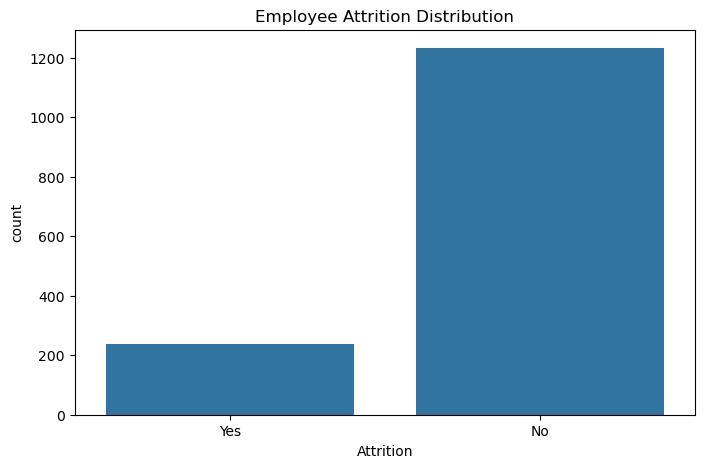

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x= 'Attrition',data=df)
plt.title('Employee Attrition Distribution')
plt.show()

With this visualization we can able to easily identify the Attrition rate.
NO = on leave 
yes = leave job 
Most of the employee stayed 
There is a data imbalanced 

In [10]:
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

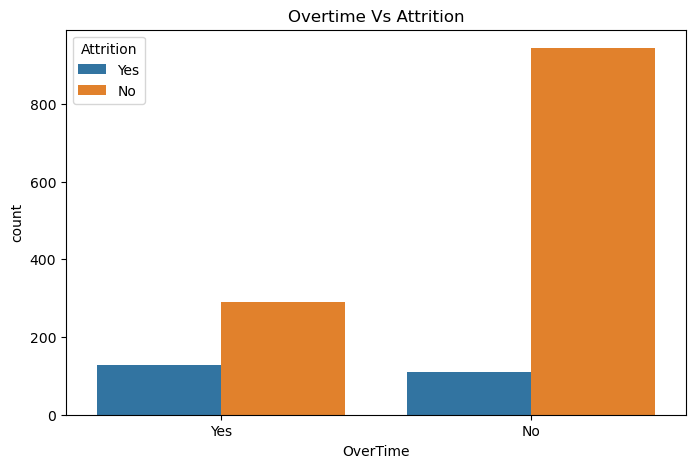

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x= 'OverTime',hue='Attrition',data=df)
plt.title('Overtime Vs Attrition')
plt.show()

We can clearly understand that Employees is behaviour

The employee with the overtime has more Attrition on other hand the employee with on over time has less the Attrition rate

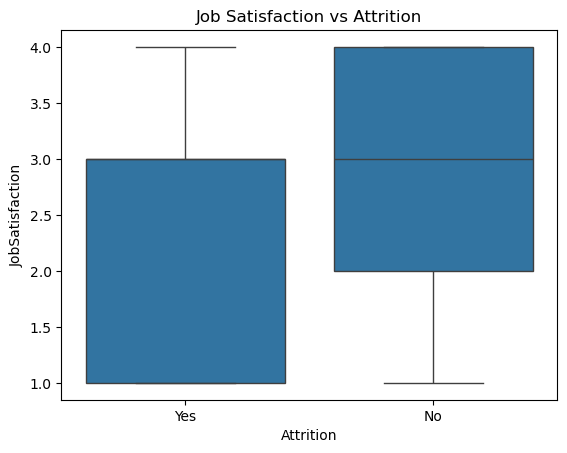

In [12]:
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()

This image is clearly represent the the lesser job satisfaction is high in Attrition

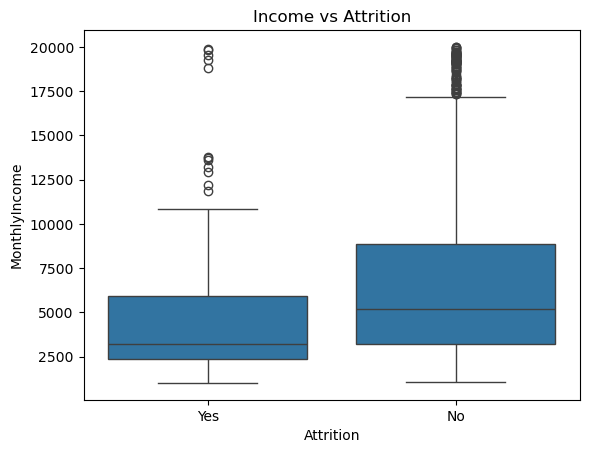

In [13]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Income vs Attrition")
plt.show()

Employees with Lower Salary left the job more attrition

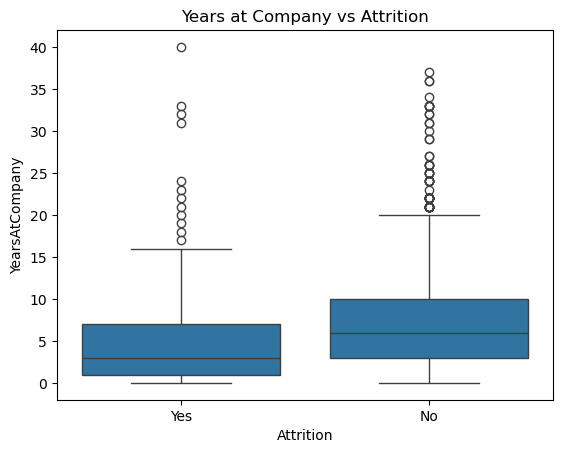

In [14]:
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title("Years at Company vs Attrition")
plt.show()

The old Employees has Attrition rate then new employee

In [15]:
cols = df.columns

In [16]:
print('Unique values of each features')
for col in cols:
       print(col, df[col].nunique())
       print('=' * 100)

Unique values of each features
Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [17]:
df = df.drop(columns=['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1)

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


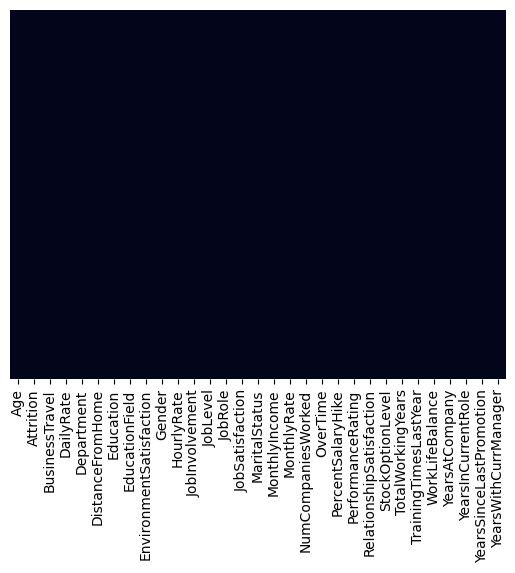

In [19]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.show()

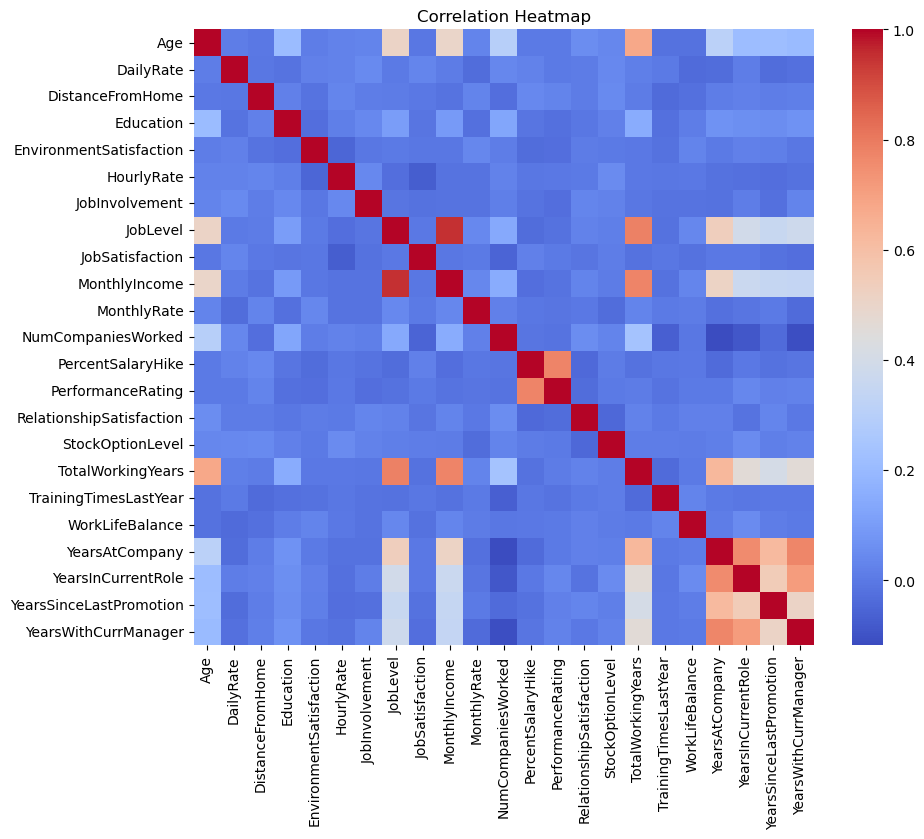

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df.select_dtypes(include=['int64','float64']).corr(),
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [23]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [24]:
print(type(X))   # must be DataFrame
print(X.shape)


<class 'pandas.core.frame.DataFrame'>
(1470, 30)


In [25]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [26]:
print(type(X_train))  # must be DataFrame

<class 'pandas.core.frame.DataFrame'>


In [27]:
cat_features = X_train.select_dtypes(include="object").columns.tolist()
num_features = X_train.select_dtypes(exclude="object").columns.tolist()

print("Categorical:", cat_features)
print("Numerical:", num_features)


Categorical: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [28]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


In [29]:
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])


In [30]:
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])


In [31]:
preprocessor.fit_transform(X_train).shape


(1176, 44)

In [32]:
model_lr = Pipeline([
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])


In [33]:
model_lr.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [37]:
from sklearn.metrics import classification_report

y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.92      0.77      0.84       247
         Yes       0.36      0.66      0.46        47

    accuracy                           0.76       294
   macro avg       0.64      0.72      0.65       294
weighted avg       0.83      0.76      0.78       294



In [41]:
y_prob = model_lr.predict_proba(X_test)[:,1]
y_pred = (y_prob > 0.3).astype(int)

In [42]:
model_rf = Pipeline([
    ("preprocess", preprocessor),
    ("rfc", RandomForestClassifier(n_estimators=300,
                                   class_weight='balanced',
                                   random_state=42))
])

In [43]:
model_rf.fit(X_train,y_train)

,steps,"[('preprocess', ...), ('rfc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [44]:
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.99      0.91       247
         Yes       0.57      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.71      0.54      0.53       294
weighted avg       0.81      0.84      0.79       294



In [59]:
model_svm = Pipeline([
    ("preprocess", preprocessor),
    ("svc", SVC(class_weight="balanced",probability=True))
])

In [60]:
model_svm.fit(X_train,y_train)

,steps,"[('preprocess', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "clf__penalty": ["l1", "l2"],
    "clf__solver": ["liblinear"]
}

grid_lr = GridSearchCV(
    model_lr,
    param_grid_lr,
    cv=5,
    scoring="recall",
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)


c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'clf__C': [0.01, 0.1, ...], 'clf__penalty': ['l1', 'l2'], 'clf__solver': ['liblinear']}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [48]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)


{'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
nan


In [49]:
best_lr = grid_lr.best_estimator_
y_pred = best_lr.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.90      0.43      0.58       247
         Yes       0.20      0.74      0.31        47

    accuracy                           0.48       294
   macro avg       0.55      0.58      0.44       294
weighted avg       0.79      0.48      0.53       294



In [52]:
param_grid_rf = {
    "rfc__n_estimators": [100, 300],
    "rfc__max_depth": [None, 10, 20],
    "rfc__min_samples_split": [2, 5, 10],
    "rfc__min_samples_leaf": [1, 2, 5]
}


grid_rf = GridSearchCV(
    model_rf,
    param_grid_rf,
    cv=3,
    scoring="recall",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)


c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'rfc__max_depth': [None, 10, ...], 'rfc__min_samples_leaf': [1, 2, ...], 'rfc__min_samples_split': [2, 5, ...], 'rfc__n_estimators': [100, 300]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [54]:

best_rf = grid_rf.best_estimator_

y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.85      0.98      0.91       247
         Yes       0.44      0.09      0.14        47

    accuracy                           0.84       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.78      0.84      0.79       294



In [61]:
param_grid_svc = {
    "svc__C": [0.1, 1, 10],
    "svc__kernel": ["rbf", "linear"],
    "svc__gamma": ["scale", 0.01, 0.1]
}


grid_svc = GridSearchCV(
    model_svm,
    param_grid_svc,
    cv=3,
    scoring="recall",
    n_jobs=-1
)

grid_svc.fit(X_train, y_train)

c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


,estimator,Pipeline(step...ility=True))])
,param_grid,"{'svc__C': [0.1, 1, ...], 'svc__gamma': ['scale', 0.01, ...], 'svc__kernel': ['rbf', 'linear']}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [62]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
nan


In [63]:
best_svc = grid_svc.best_estimator_
y_pred = best_svc.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.91      0.74      0.81       247
         Yes       0.31      0.62      0.41        47

    accuracy                           0.72       294
   macro avg       0.61      0.68      0.61       294
weighted avg       0.81      0.72      0.75       294



In [65]:
y_prob = best_svc.predict_proba(X_test)[:,1]
y_pred = (y_prob > 0.3).astype(int)


In [67]:
import joblib
joblib.dump(best_rf, "attrition_model.pkl")

['attrition_model.pkl']